**Loading The Necessary Libraries**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Loading Dataset


Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.


In [ ]:
df = pd.read_csv('Cardio-Heart-Dataset.csv',sep=";")

# Data visualization

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


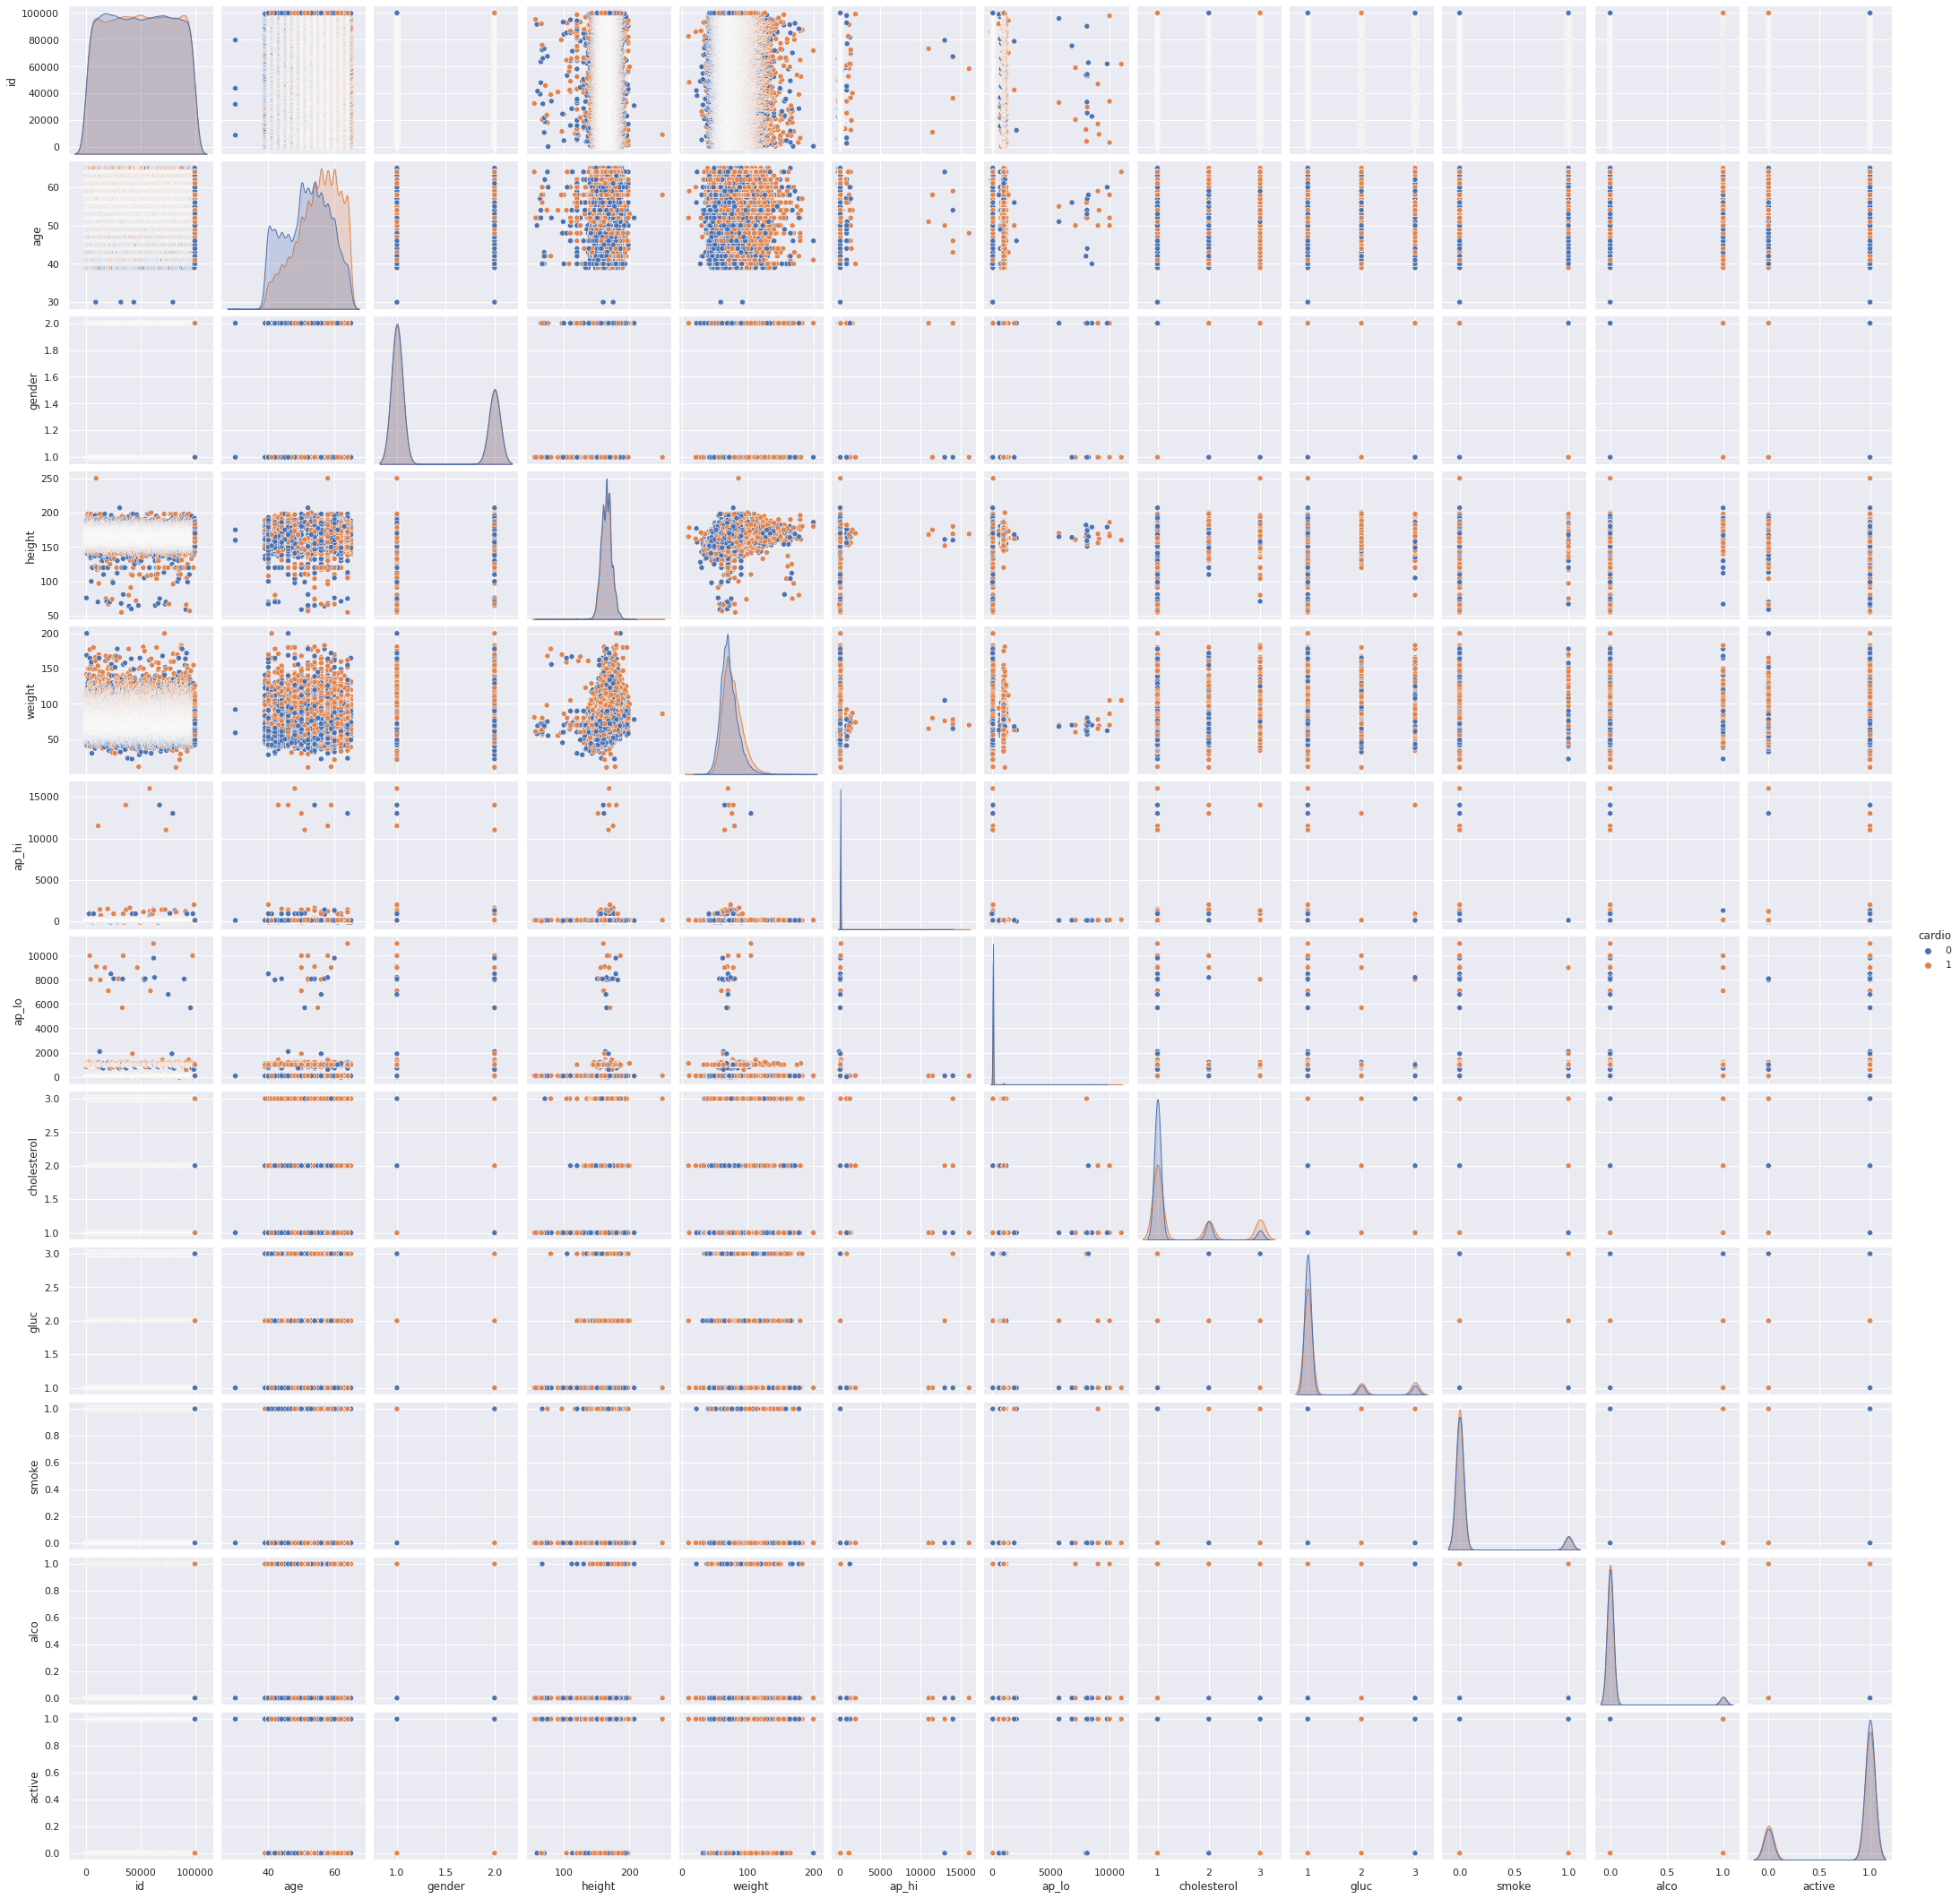

In [ ]:
#sns.pairplot(df,hue = 'cardio')

In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
if(df.duplicated().sum()>0):
  print("Duplicates Found.Removing Duplicate")
  df=df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["age"]=round(df["age"]/365)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

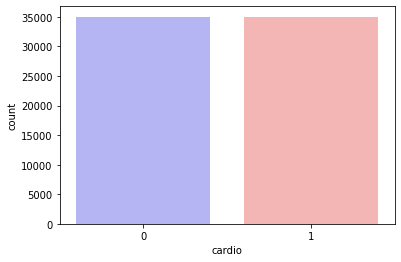

In [ ]:
sns.countplot(x="cardio", data=df, palette="bwr")
plt.show()

In [ ]:
print(round(df.cardio.value_counts()[0]*100/sum(df.cardio.value_counts()),2),"% of Non-Heart Disease Patients")
print(round(df.cardio.value_counts()[1]*100/sum(df.cardio.value_counts()),2),"% of Heart Disease Patients")

50.03 % of Non-Heart Disease Patients
49.97 % of Heart Disease Patients


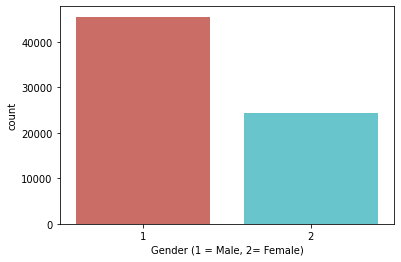

In [ ]:
sns.countplot(x='gender', data=df, palette="hls")
plt.xlabel("Gender (1 = Male, 2= Female)")
plt.show()

In [ ]:
print(round(df.gender.value_counts()[1]*100/sum(df.gender.value_counts()),2),"% of Male Patients")
print(round(df.gender.value_counts()[2]*100/sum(df.gender.value_counts()),2),"% of Femaale Patients")

65.04 % of Male Patients
34.96 % of Femaale Patients


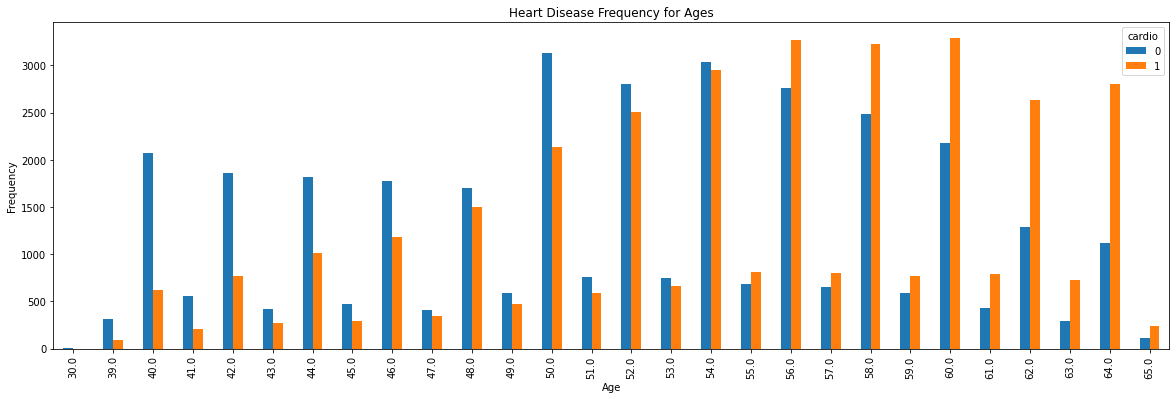

In [ ]:
pd.crosstab(df.age,df.cardio).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print("Average Age of CVD patients:", round(df.groupby('cardio').mean()['age'][1]))

Average Age of CVD patients: 55


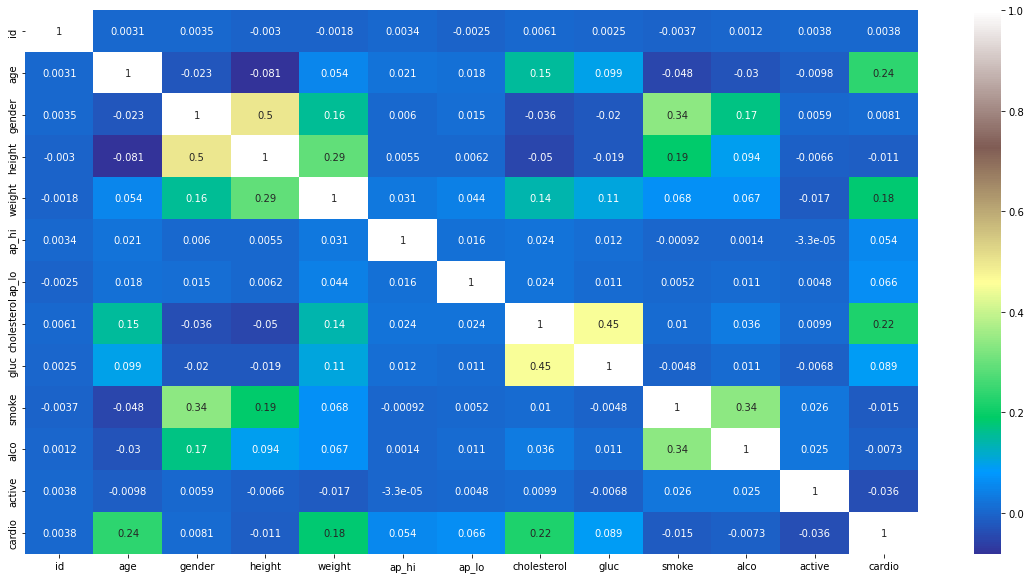

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

In [ ]:
correlation = df.corr()
correlation["cardio"].sort_values(ascending=False)

cardio         1.000000
age            0.237749
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

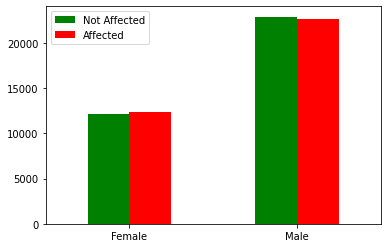

In [ ]:

Affected = [len(df[(df['gender']== 2) & (df['cardio']==1)]['cardio']),len(df[(df['gender']== 1) & (df['cardio']==1)]['cardio'])]
Not_Affected = [len(df[(df['gender']== 2) & (df['cardio']==0)]['cardio']),len(df[(df['gender']== 1) & (df['cardio']==0)]['cardio'])]
index = df['gender'].replace(2, 'Female').replace(1, 'Male').unique()
axdf = pd.DataFrame({'Not Affected': Not_Affected,
                   'Affected': Affected,}, index=index)
ax = axdf.plot.bar(rot=0,color={"Affected": "red", "Not Affected": "green"})

# Data Train-Test Split

In [ ]:
x=df.iloc[:,:-1]

In [ ]:
y=df.iloc[:,-1]

In [ ]:
x

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model1=RandomForestClassifier(n_estimators = 100) .fit(X_train,Y_train)

In [ ]:
model1.score(X_test,Y_test)

0.7209047619047619

# Feature Engineering: Feature Selection & Model Testing 

##Feature Importance

### **Feature Selection using KBest f_classif**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(x,y)

SelectKBest()

In [ ]:
score=pd.DataFrame(fit_feature.scores_,columns=['Score'])

In [ ]:
df_column_names=pd.DataFrame(x.columns)
df_column_names

,0
0,id
1,age
2,gender
3,height
4,weight
5,ap_hi
6,ap_lo
7,cholesterol
8,gluc
9,smoke


In [ ]:
feature_score=pd.concat([df_column_names,score],axis=1)
feature_score.nlargest(13,'Score')

,0,Score
1,age,4193.661786
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541
3,height,8.197397
2,gender,4.603641


([<matplotlib.patches.Wedge at 0x7f5c281a8950>,
 [Text(1.3218485869941987, 3.023692496445603, 'age'),
  Text(-3.2523110660600834, -0.5589926024404328, 'cholesterol'),
  Text(0.8288359830252291, -3.1942183571638623, 'weight'),
  Text(2.8937564539734897, -1.5862451213752482, 'gluc'),
  Text(3.1873394427857527, -0.8549077590373172, 'ap_lo'),
  Text(3.276030894831894, -0.3970158386096739, 'ap_hi'),
  Text(3.297564405596226, -0.12676352371566377, 'active'),
  Text(3.299861300879603, -0.030255494660906254, 'smoke'),
  Text(3.29999153861029, -0.007472957947924671, 'height')],
 [Text(0.7210083201786538, 1.6492868162430558, '36.9%'),
  Text(-1.7739878542145906, -0.30490505587659966, '31.7%'),
  Text(0.4520923543773976, -1.7423009220893793, '21.0%'),
  Text(1.5784126112582668, -0.865224611659226, '4.9%'),
  Text(1.7385487869740466, -0.46631332311126383, '2.7%'),
  Text(1.7869259426355781, -0.21655409378709478, '1.8%'),
  Text(1.7986714939615773, -0.06914374020854386, '0.8%'),
  Text(1.7999243459

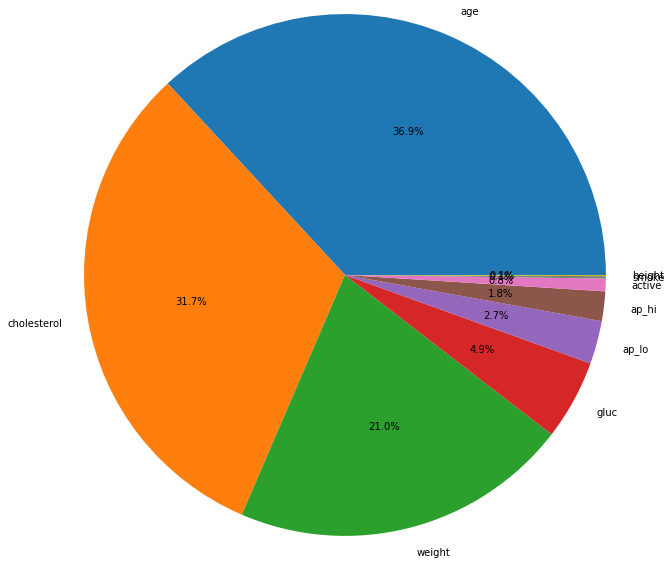

In [ ]:
import warnings
warnings.filterwarnings('ignore')
exp=[0,0,0,0,0,0,0,0,0]
plt.pie(feature_score.nlargest(11,'Score')['Score'][:-2],labels=feature_score.nlargest(11,'Score')[0][:-2],explode=exp,radius=3,autopct='%2.1f%%')

In [ ]:
X_train_fs = X_train.drop(['id'], axis = 1)
X_test_fs = X_test.drop(['id'], axis = 1)

In [ ]:
X_train_fs

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
1646,64.0,1,156,89.0,150,100,1,3,0,0,1
27211,50.0,1,154,68.0,150,90,3,3,0,0,0
55037,62.0,2,170,61.0,140,90,1,1,1,0,1
43054,58.0,1,145,69.0,140,90,3,3,0,0,1
49188,54.0,2,174,168.0,125,90,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11532,48.0,1,160,82.0,140,100,1,1,0,0,1
54578,54.0,2,162,64.0,140,90,2,3,0,0,1
56760,64.0,2,160,103.0,130,90,3,3,0,0,1
30727,47.0,1,165,68.0,110,70,3,3,0,0,1


### **StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()  
scalable_columns=['age','height','weight','ap_hi','ap_lo']
df[scalable_columns]=standardScaler.fit_transform(df[scalable_columns])

In [ ]:
x=df.iloc[:,:-1]
y= df['cardio']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [ ]:
X_train_sc

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
1646,2325,1.575895,1,-1.018168,1.027693,0.137541,0.017879,1,3,0,0,1
27211,38905,-0.493505,1,-1.261771,-0.431081,0.137541,-0.035180,3,3,0,0,0
55037,78509,1.280266,2,0.687055,-0.917339,0.072610,-0.035180,1,1,1,0,1
43054,61502,0.689009,1,-2.357986,-0.361615,0.072610,-0.035180,3,3,0,0,1
49188,70222,0.097752,2,1.174262,6.515460,-0.024786,-0.035180,2,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11532,16491,-0.789134,1,-0.530961,0.541435,0.072610,0.017879,1,1,0,0,1
54578,77860,0.097752,2,-0.287358,-0.708942,0.072610,-0.035180,2,3,0,0,1
56760,81027,1.575895,2,-0.530961,2.000209,0.007679,-0.035180,3,3,0,0,1
30727,43929,-0.936948,1,0.078047,-0.431081,-0.122182,-0.141297,3,3,0,0,1


## **One Hot Encoding**

In [ ]:
X_label_enc = pd.get_dummies(df, columns=['gender', 'cholesterol','gluc','smoke','alco','active'])
X_label_enc=X_label_enc.drop(['cardio'], axis=1)
X_label_enc.head()

,id,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,0,-0.493505,0.443452,-0.847873,-0.122182,-0.088238,0,1,1,0,0,1,0,0,1,0,1,0,0,1
1,1,0.245566,-1.018168,0.749831,0.072610,-0.035180,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,2,-0.197877,0.078047,-0.708942,0.007679,-0.141297,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,3,-0.789134,0.565254,0.541435,0.137541,0.017879,0,1,1,0,0,1,0,0,1,0,1,0,0,1
4,4,-0.789134,-1.018168,-1.264666,-0.187113,-0.194356,1,0,1,0,0,1,0,0,1,0,1,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train_enc, X_test_enc, Y_train, Y_test = train_test_split(X_label_enc, y, test_size=0.3, random_state=40)

## **Function For Getting Performance Metrices**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def getClassificationResult(model,x_test,y_test):
    y_true=y_test
    y_pred=model.predict(x_test)
    
    if len(y_pred.shape) == 2:
        y_pred=np.argmax(y_pred, axis=1)
    if len(y_true.shape) == 2:
        y_true=np.argmax(y_true, axis=1)
    ac=round(accuracy_score(y_true, y_pred),4)
    pr=round(precision_score(y_true, y_pred,average='weighted'),4)
    re=round(recall_score(y_true, y_pred,average='weighted'),4)
    f1=round(f1_score(y_true, y_pred,average='weighted'),4)
    #print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)
    return ac,pr,re,f1

## **Boosting**

#### XGB Classifier

In [ ]:
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(x,y)

[19:22:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
print(model.feature_importances_) 

[0.01844951 0.07531263 0.01861268 0.01716824 0.02328134 0.5129908
 0.02697803 0.16601117 0.03104332 0.04165267 0.02729756 0.04120212]


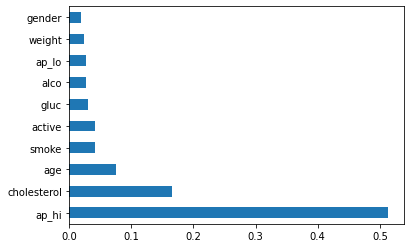

<Figure size 576x432 with 0 Axes>

In [ ]:
# plot the graph of feature importances for better visualization 

feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

# **Machine Learning Model**

### **LogisticRegression**

With All Feature

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=1000).fit(X_train,Y_train)

In [ ]:
model1.score(X_test,Y_test)

0.6942380952380952

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.6942  Precision= 0.6948  Recall= 0.6942  F1 Score=  0.694


With Selected Feature

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=1000).fit(X_train_fs,Y_train)

In [ ]:
model1.score(X_test_fs,Y_test)

0.7186190476190476

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.7186  Precision= 0.7197  Recall= 0.7186  F1 Score=  0.7182


With Feature Scaling

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=1000).fit(X_train_sc,Y_train)

In [ ]:
model1.score(X_test_sc,Y_test)

0.4989047619047619

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.4989  Precision= 0.2489  Recall= 0.4989  F1 Score=  0.3321


With One Hot Encoding

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=5000).fit(X_train_enc,Y_train)


In [ ]:
model1.score(X_test_enc,Y_test)

0.4989047619047619

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.4989  Precision= 0.2489  Recall= 0.4989  F1 Score=  0.3321


### **Support Vector Machine(SVM)**

#### With All Feature

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.7166  Precision= 0.7177  Recall= 0.7166  F1 Score=  0.7162


#### With Selected Feature

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_fs,Y_train)
classifier.score(X_test_fs,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

#### With Feature Scaling

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_sc,Y_train)
classifier.score(X_test_sc,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

With One Hot Encoding

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_enc,Y_train)
classifier.score(X_test_enc,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

### **K-Nearest Neighbour(KNN)**




#### With All Feature

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.6379  Precision= 0.6393  Recall= 0.6379  F1 Score=  0.6369


#### With Selected Feature

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_fs,Y_train)
classifier.score(X_test_fs,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.6893  Precision= 0.6895  Recall= 0.6893  F1 Score=  0.6892


#### With Feature Scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_sc,Y_train)
classifier.score(X_test_sc,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.5051  Precision= 0.5051  Recall= 0.5051  F1 Score=  0.5051


With One Hot Encoding

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_enc,Y_train)
classifier.score(X_test_enc,Y_test)
ac,pr,re,f1 = getClassificationResult(classifier,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.5038  Precision= 0.5037  Recall= 0.5038  F1 Score=  0.5037


### **LDA - PCA**

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [ ]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit(x,y).transform(x)

In [ ]:
lda.explained_variance_ratio_

array([1.])

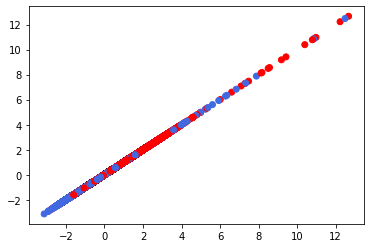

In [ ]:
plt.scatter(X_lda[:,0],X_lda[:,0],c=vectorizer(y))

In [ ]:
pca = PCA()
X_pca = pca.fit(x).transform(x)

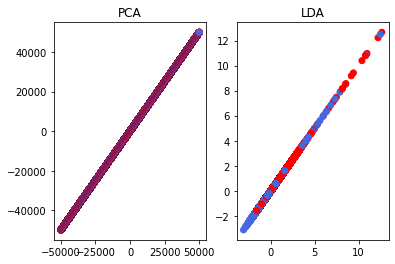

In [ ]:
from pylab import *
subplot(1,2,1)
title("PCA")
plt.scatter(X_pca[:,0],X_pca[:,0],c=vectorizer(y))
subplot(1,2,2)
title("LDA")
plt.scatter(X_lda[:,0],X_lda[:,0],c=vectorizer(y))

In [ ]:
X_train_lda, X_test_lda, Y_train_lda, Y_test_lda = train_test_split(x, y)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.6483333333333333


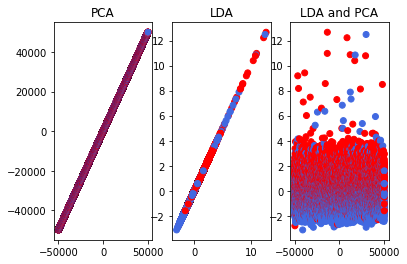

In [ ]:
from pylab import *
subplot(1,3,1)
title("PCA")
plt.scatter(X_pca[:,0],X_pca[:,0],c=vectorizer(y))
subplot(1,3,2)
title("LDA")
plt.scatter(X_lda[:,0],X_lda[:,0],c=vectorizer(y))
subplot(1,3,3)
title("LDA and PCA")
plt.scatter(X_pca[:,0],X_lda[:,0],c=vectorizer(y))

In [ ]:
X_lda.shape


(70000, 1)

### **Random Forest Classifier**

With All Feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train,Y_train)
Rfc.score(X_test,Y_test)

0.7195714285714285

In [ ]:
ac,pr,re,f1 = getClassificationResult(Rfc,X_test,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.7196  Precision= 0.7199  Recall= 0.7196  F1 Score=  0.7195


 With Selected Feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train_fs,Y_train)
Rfc.score(X_test_fs,Y_test)

0.7047619047619048

In [ ]:
ac,pr,re,f1 = getClassificationResult(Rfc,X_test_fs,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.7048  Precision= 0.7048  Recall= 0.7048  F1 Score=  0.7048


 With Feature Scaling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train_sc,Y_train)
Rfc.score(X_test_sc,Y_test)

0.7198095238095238

In [ ]:
ac,pr,re,f1 = getClassificationResult(Rfc,X_test_sc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.7198  Precision= 0.7201  Recall= 0.7198  F1 Score=  0.7197


With One Hot Encoding

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train_enc,Y_train)
Rfc.score(X_test_enc,Y_test)

0.7173809523809523

In [ ]:
ac,pr,re,f1 = getClassificationResult(Rfc,X_test_enc,Y_test)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.7174  Precision= 0.7176  Recall= 0.7174  F1 Score=  0.7173


### **DecisionTree classifier**

With All Feature

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train,Y_train)
Dtc.score(X_test,Y_test)

0.6331428571428571

With Selected Feature

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train_fs,Y_train)
Dtc.score(X_test_fs,Y_test)

0.635095238095238

With Feature Scaling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train_sc,Y_train)
Dtc.score(X_test_sc,Y_test)

0.6319047619047619

With One Hot Encoding

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(X_train_enc,Y_train)
Dtc.score(X_test_enc,Y_test)

0.6322857142857143

# Auto ML

### **EvalMl**

In [ ]:
!pip install evalml

In [ ]:
import evalml


In [ ]:
X_train,X_test,Y_train,Y_test=evalml.preprocessing.split_data(x,y,problem_type='binary')

In [ ]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [ ]:
X_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
34789,49694,54.0,1,145,70.0,130,80,1,1,0,0,1
22336,31912,47.0,1,159,60.0,100,60,1,1,0,0,1
53971,76994,50.0,1,165,63.0,120,80,1,1,0,0,1
27774,39713,54.0,1,154,54.0,110,70,1,1,0,0,1
28041,40094,64.0,2,178,82.0,130,80,3,1,0,0,1


In [ ]:
from evalml import AutoMLSearch

In [ ]:
automl = AutoMLSearch(X_train = X_train,y_train = Y_train, problem_type='binary',max_batches=1,optimize_thresholds=True)

In [ ]:
automl.search()

In [ ]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,4,LightGBM Classifier w/ Label Encoder + Imputer,4,0.543558,0.003041,0.543558,96.850563,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,3,XGBoost Classifier w/ Label Encoder + Imputer,3,0.543928,0.003355,0.543928,96.848418,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.550674,0.001700,0.550674,96.809336,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,2,Logistic Regression Classifier w/ Label Encode...,2,0.582376,0.006997,0.582376,96.625649,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.589182,0.004858,0.589182,96.586212,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.596385,0.005164,0.596385,96.544481,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,5,CatBoost Classifier w/ Label Encoder + Imputer,5,0.635119,0.000424,0.635119,96.320048,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,8,Extra Trees Classifier w/ Label Encoder + Imputer,8,0.641785,0.001266,0.641785,96.281425,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Binary Classification Pipeline,0,17.258903,0.000534,17.258903,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [ ]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'LightGBM Classifier': ['LightGBM Classifier', 'Imputer.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'LightGBM Classifier':{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 100, 'max_depth': 0, 'num_leaves': 31, 'min_child_samples': 20, 'n_jobs': -1, 'bagging_freq': 0, 'bagging_fraction': 0.9}}, random_seed=0)

In [ ]:
best_pipeline = automl.best_pipeline

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


**************************************************
* LightGBM Classifier w/ Label Encoder + Imputer *
**************************************************

Problem Type: binary
Model Family: LightGBM

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. LightGBM Classifier
	 * boosting_type : gbdt
	 * learning_rate : 0.1
	 * n_estimators : 100
	 * max_depth : 0
	 * num_leaves : 31
	 * min_child_samples : 20
	 * n_jobs : -1
	 * bagging_freq : 0
	 * bagging_fraction : 0.9

Training
Training for binary problems.
Total training time (including CV): 3.5 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.543       0.450 0.598 0.799      0.706 0.736                     0.724     

In [ ]:
scores = best_pipeline.score(X_test, Y_test,  objectives=evalml.objectives.get_core_objectives('binary'))
print(f'Accuracy Binary: {scores["Accuracy Binary"]}')

Accuracy Binary: 0.7171428571428572


# **Comparison**

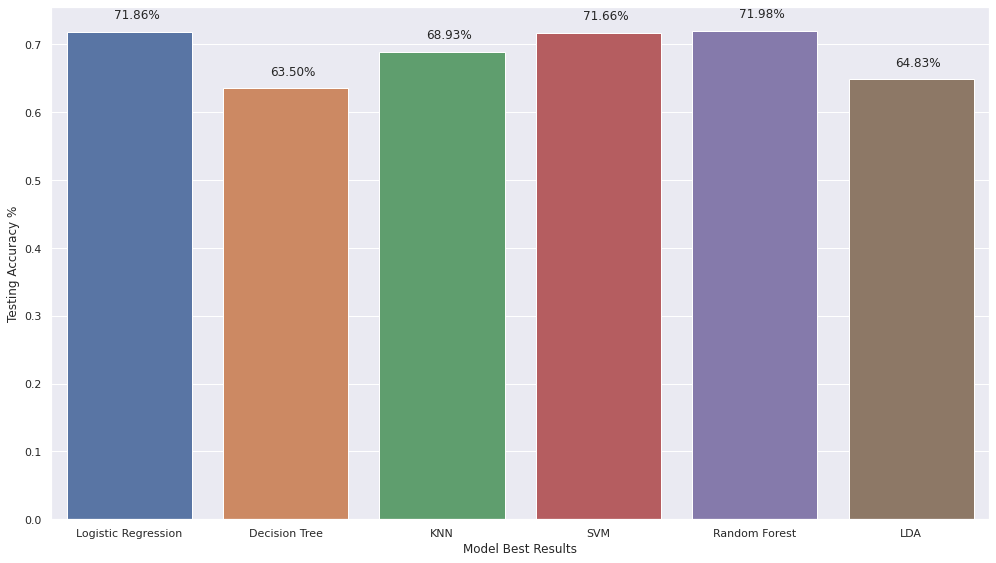

In [3]:
methods = ["Logistic Regression","Decision Tree", "KNN", "SVM", "Random Forest","LDA"]
best_accuracy = [.7186, .6350, .6893, .7166, .7198,.6483]

sns.set()
plt.figure(figsize=(14,8))
plt.ylabel("Testing Accuracy %")
plt.xlabel("Model Best Results")
sns.barplot(x=methods, y=best_accuracy, palette="deep")

for idx, method in enumerate(methods):
    plt.text(idx -0.1, best_accuracy[idx]+0.02, "{:.2f}%".format(best_accuracy[idx]*100))
    
plt.tight_layout()